# Tarea 4

A partir de las lecturas de la Unidad, resuelva los planteamientos del problema
siguiente.

Se aplicará un examen de colocación de matemáticas a todos los estudiantes de un nuevo curso de una universidad. Las calificaciones obtenidas de 20 estudiantes se muestran en la tabla siguiente:

| Examen de colocación | Calificación en curso |
|----------------------|-----------------------|
| 50                   | 53                    |
| 35                   | 41                    |
| 35                   | 61                    |
| 40                   | 56                    |
| 55                   | 68                    |
| 65                   | 36                    |
| 35                   | 11                    |
| 60                   | 70                    |
| 90                   | 79                    |
| 35                   | 50                    |
| 90                   | 54                    |
| 80                   | 91                    |
| 60                   | 48                    |
| 60                   | 71                    |
| 60                   | 71                    |
| 40                   | 47                    |
| 55                   | 53                    |
| 50                   | 68                    |
| 65                   | 57                    |
| 50                   | 79                    |

1. Elabore un diagrama de dispersión.

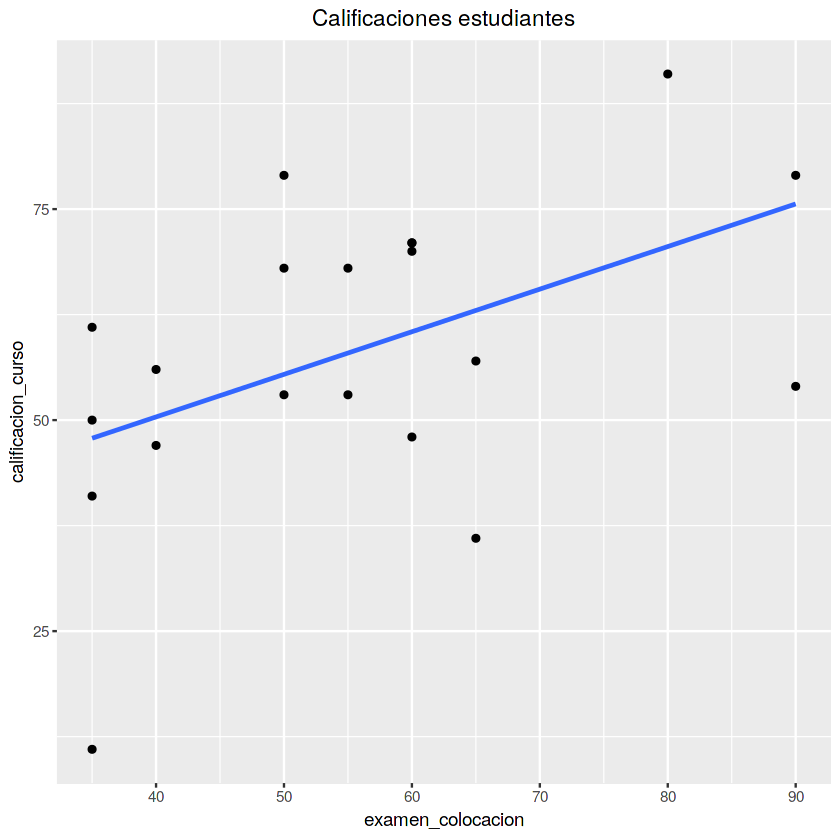

In [1]:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))

n <- 1:20
examen_colocacion <- c(50, 35, 35, 40, 55, 65, 35, 60, 90, 35, 90, 80, 60, 60, 60, 40, 55, 50, 65, 50)
calificacion_curso <- c(53, 41, 61, 56, 68, 36, 11, 70, 79, 50, 54, 91, 48, 71, 71, 47, 53, 68, 57, 79)

estudiantes_universitarios <- data.frame(n, examen_colocacion, calificacion_curso)

mi_grafico <- estudiantes_universitarios %>%
  ggplot(aes(x=examen_colocacion, y=calificacion_curso)) +
    ggtitle("Calificaciones estudiantes") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_point(stat="identity") +
    geom_smooth(method="lm" , se = FALSE) #Esto es para agregar la línea
    # se  = FALSE es para no mostrar el intervalo de confianza
plot(mi_grafico)

2. Encuentre la ecuación de la recta de regresión con la finalidad de
predecir las calificaciones del curso a partir de las del examen de
colocación.

```
La gráfica de la recta está dada por:
```
$$y' = a + bx + e$$
    
```
Donde

    a: Es la calificación del examen de colocación.

    x: Es la calificación del curso.

    e: Es el error estándar.
```

Calculamos a y b con las siguientes formulas:

$$a = \bar{y} - b\bar{x}$$

$$b = r_{x,y}\frac{s_{y}}{s_{x}}$$

``` 
- Para b En la parte siguiente se calculó cov(x,y) = 138.65 y V(x) que también se expresa como D(x) = 16.5755844542508, entonces usamos los valores
- Para a x_barra = 55.5 y_barra = 58.2
```

In [2]:
b <- 0.482969105667483 * (17.3193533366578/16.5755844542508)
a <- 58.2 - (b * 55.5)
print(paste("La recta y = a + bx=", a, " + (",b," * x)"))

[1] "La recta y = a + bx= 30.1924476797088  + ( 0.504640582347588  * x)"


3. Determine el coeficiente de correlación.

In [3]:
media_examen_colocacion <- mean(examen_colocacion)
media_calificacion_curso <- mean(calificacion_curso)

print(paste("media examen colocacion:",media_examen_colocacion))
print(paste("media calificación curso:",media_calificacion_curso))

estudiantes_universitarios$"ex * cc" <- estudiantes_universitarios$examen_colocacion * estudiantes_universitarios$calificacion_curso
estudiantes_universitarios$"ex^2 " <- estudiantes_universitarios$examen_colocacion ^ 2
estudiantes_universitarios$"cc^2" <- estudiantes_universitarios$calificacion_curso ^ 2
estudiantes_universitarios$"x - x_barra" <- estudiantes_universitarios$examen_colocacion - media_examen_colocacion
estudiantes_universitarios$"y - y_barra" <- estudiantes_universitarios$calificacion_curso - media_calificacion_curso
estudiantes_universitarios$"(x-x_barra)-(y-y_barra)" <- estudiantes_universitarios$"x - x_barra" * estudiantes_universitarios$"y - y_barra"

[1] "media examen colocacion: 55.5"
[1] "media calificación curso: 58.2"


| n  | examen colocacion (x) | calificacion curso (y) | x * y | x<sup>2</sup>  | y<sup>2</sup>  | x - x_media | y - y_media | (x - x_media)(y - y_media) |
|----|-----------------------|------------------------|-------|------|------|-------------|-------------|----------------------------|
| 1  | 50                    | 53                     | 2650  | 2500 | 2809 | -5.5        | -5.2        | 28.6                       |
| 2  | 35                    | 41                     | 1435  | 1225 | 1681 | -20.5       | -17.2       | 352.6                      |
| 3  | 35                    | 61                     | 2135  | 1225 | 3721 | -20.5       | 2.8         | -57.4                      |
| 4  | 40                    | 56                     | 2240  | 1600 | 3136 | -15.5       | -2.2        | 34.1                       |
| 5  | 55                    | 68                     | 3740  | 3025 | 4624 | -0.5        | 9.8         | -4.9                       |
| 6  | 65                    | 36                     | 2340  | 4225 | 1296 | 9.5         | -22.2       | -210.9                     |
| 7  | 35                    | 11                     | 385   | 1225 | 121  | -20.5       | -47.2       | 967.6                      |
| 8  | 60                    | 70                     | 4200  | 3600 | 4900 | 4.5         | 11.8        | 53.1                       |
| 9  | 90                    | 79                     | 7110  | 8100 | 6241 | 34.5        | 20.8        | 717.6                      |
| 10 | 35                    | 50                     | 1750  | 1225 | 2500 | -20.5       | -8.2        | 168.1                      |
| 11 | 90                    | 54                     | 4860  | 8100 | 2916 | 34.5        | -4.2        | -144.9                     |
| 12 | 80                    | 91                     | 7280  | 6400 | 8281 | 24.5        | 32.8        | 803.6                      |
| 13 | 60                    | 48                     | 2880  | 3600 | 2304 | 4.5         | -10.2       | -45.9                      |
| 14 | 60                    | 71                     | 4260  | 3600 | 5041 | 4.5         | 12.8        | 57.6                       |
| 15 | 60                    | 71                     | 4260  | 3600 | 5041 | 4.5         | 12.8        | 57.6                       |
| 16 | 40                    | 47                     | 1880  | 1600 | 2209 | -15.5       | -11.2       | 173.6                      |
| 17 | 55                    | 53                     | 2915  | 3025 | 2809 | -0.5        | -5.2        | 2.6                        |
| 18 | 50                    | 68                     | 3400  | 2500 | 4624 | -5.5        | 9.8         | -53.9                      |
| 19 | 65                    | 57                     | 3705  | 4225 | 3249 | 9.5         | -1.2        | -11.4                      |
| 20 | 50                    | 79                     | 3950  | 2500 | 6241 | -5.5        | 20.8        | -114.4                     |

De la tabla anterior, se obtienen los siguientes valores:

| n  | sum(x) | sum(y) | sum(x*y) | sum(x<sup>2</sup>) | sum(y<sup>2</sup>) | sum ((x - x_media)(y - y_media)) |
|----|--------|--------|----------|----------|----------|----------------------------------|
| 20 | 1110   | 1164   | 67375    | 67100    | 73744    | 2773                             |

Calculando la covarianza con la fórmula

$$cov(x,y)= \frac{\sum_{i=1}^n((x - \bar{x})(y - \bar{y}))}{n}$$

Obtenemos:

In [4]:
#cov(x, y)=
cov <- 2773/20
print(paste("cov(x,y)=",cov))
#¿Por qué cov de R da otro resultado?

[1] "cov(x,y)= 138.65"


Calculando la desviación estándar con la fórmula:

$$D(x)=\sqrt{\frac{\sum_{i=1}^n (x_{i} - \bar{x})^2}{n}}$$

Se obtiene:

In [5]:
#D(ec)=
D_x <- sqrt(5495/20)
print(paste("D(x)=",D_x))
#D(cc)=
D_y <- sqrt(5999.20/20)
print(paste("D(y)=",D_y))

[1] "D(x)= 16.5755844542508"
[1] "D(y)= 17.3193533366578"


Usando la formula para el coeficiente de correlación:

$$r_{x,y}=\frac{cov(x,y)}{D(x)D(y)}$$

In [6]:
#r_xy=
r_xy <- cov / (D_x * D_y)
print(paste("r_xy=",r_xy))

[1] "r_xy= 0.482969105667483"


Para verificar que se obtuvo el resultado correcto, usamos la función _cor_ de R

In [7]:
cor(estudiantes_universitarios[,2:3])

,examen_colocacion,calificacion_curso
examen_colocacion,1.0000000,0.4829691
calificacion_curso,0.4829691,1.0000000


4. Interprete de manera breve el coeficiente de correlación.

```
El coeficiente de correlación entre las variables es moderado, lo que significa que la calificación en el examen de admisión no necesariamente muestra qué calificación tendrán en el curso.
```

5. Estime la calificación que obtendrá un alumno en el curso, si obtuvo 64 en el examen de colocación.

In [8]:
y <- 30.1924476797088  + ( 0.504640582347588  * 64)
print(y)

[1] 62.48944


6. Si la calificación mínima aprobatoria para el curso es de 70, estime la calificación mínima que debe
obtener un estudiante en el examen de colocación para que, según la ecuación de regresión, obtenga el 70.

```
Despejando x de y = a + bx obtenemos
```
$$x = (y - a)/b$$


In [9]:
x <- (70 - 30.1924476797088)/0.504640582347588
print(x)

[1] 78.88298


Revisando los resultados de la recta con R

In [10]:
lm_estudiantes <- lm(estudiantes_universitarios$calificacion_curso ~ estudiantes_universitarios$examen_colocacion)
lm_estudiantes


Call:
lm(formula = estudiantes_universitarios$calificacion_curso ~ 
    estudiantes_universitarios$examen_colocacion)

Coefficients:
                                 (Intercept)  
                                     30.1924  
estudiantes_universitarios$examen_colocacion  
                                      0.5046  
